In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd
import numpy as np
from importlib import reload
import cv2

In [2]:
from sklearn.manifold import TSNE

In [3]:
import utils
reload(utils)

Using TensorFlow backend.


<module 'utils' from 'C:\\Users\\user\\Jupyter\\DS 5230\\Project\\ds5230_2020_project_self\\ds5230_2020_project\\utils.py'>

In [4]:
PROJECT_PATH = getcwd()
PICKLE_PATH = PROJECT_PATH + "\\pickles\\"

# Loading Train Images

In [5]:
train_images = utils.open_pickle(file = PICKLE_PATH + "train_images" )

In [6]:
IMG_DIMENSION = train_images[0].shape
IMG_DIMENSION

(80, 60, 3)

In [7]:
train_images = train_images.reshape((train_images.shape[0], IMG_DIMENSION[0]*IMG_DIMENSION[1]*IMG_DIMENSION[2]))

In [8]:
train_images = train_images/255.0 # normalizing image

In [9]:
print("Total images: %d"%train_images.shape[0])
print("Dimension of image before PCA Transformation: %d"%train_images.shape[1])

Total images: 10796
Dimension of image before PCA Transformation: 14400


# Loading PCA object and taking PCA transformation

In [10]:
optimal_metrics = utils.open_pickle(PICKLE_PATH + "optimal_metrics")
MAX_PCA_COMPONENTS = optimal_metrics['MAX_PCA_COMPONENTS']
pca_fit = utils.open_pickle(PICKLE_PATH + "pca_fit_"  + str(MAX_PCA_COMPONENTS) + '_components')

In [11]:
train_images = pca_fit.transform(train_images)

In [12]:
print("Dimension of image after PCA Transformation: %d"%train_images.shape[1])

Dimension of image after PCA Transformation: 145


# Performing T-SNE on PCA transfomed images

In [13]:
%%time
tsne = TSNE(n_components = 2,
            verbose= 1,
            n_iter=2000,
            n_iter_without_progress=100,
            random_state=40,
            perplexity=25)
tsne_results = tsne.fit_transform(train_images)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10796 samples in 0.478s...
[t-SNE] Computed neighbors for 10796 samples in 17.571s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10796
[t-SNE] Computed conditional probabilities for sample 2000 / 10796
[t-SNE] Computed conditional probabilities for sample 3000 / 10796
[t-SNE] Computed conditional probabilities for sample 4000 / 10796
[t-SNE] Computed conditional probabilities for sample 5000 / 10796
[t-SNE] Computed conditional probabilities for sample 6000 / 10796
[t-SNE] Computed conditional probabilities for sample 7000 / 10796
[t-SNE] Computed conditional probabilities for sample 8000 / 10796
[t-SNE] Computed conditional probabilities for sample 9000 / 10796
[t-SNE] Computed conditional probabilities for sample 10000 / 10796
[t-SNE] Computed conditional probabilities for sample 10796 / 10796
[t-SNE] Mean sigma: 3.760079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.758186
[t-SNE] KL

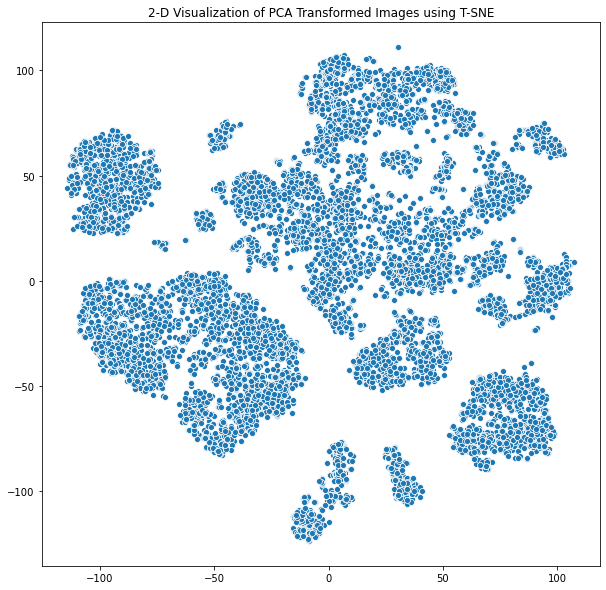

In [16]:
plt.subplots(figsize = (10, 10))
sns.scatterplot(x = tsne_results[:,0], y = tsne_results[:,1])
fig_name = "2-D Visualization of PCA Transformed Images using T-SNE"
plt.title(fig_name)
plt.savefig(".\\Outputs\\" + fig_name + ".png")

Here we can identify 10-12 clusters

# Getting KMeans Fit and Plotting 2-D Visualization 

In [19]:
N_CLUSTERS = optimal_metrics['K-MEANS_CLUSTERS']
kmeans_pca_fit = utils.open_pickle(PICKLE_PATH + "K-Means_PCA_%scomponents_%sclusters"%(str(MAX_PCA_COMPONENTS),
                                                                                    str(N_CLUSTERS)))

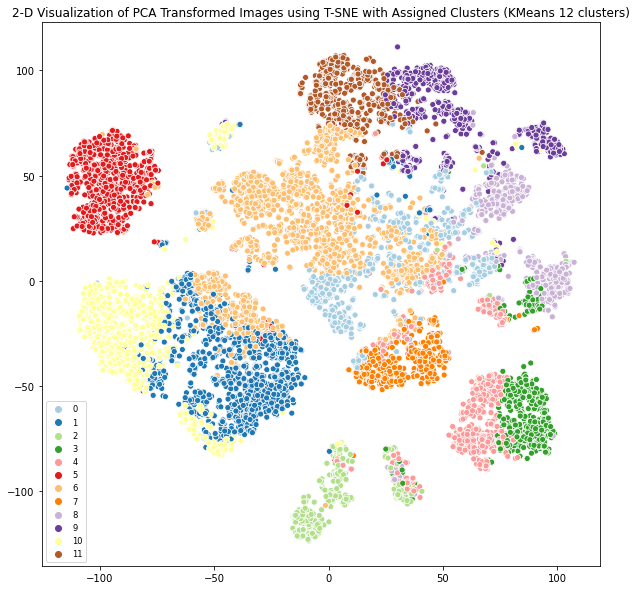

In [22]:
images_clusters = kmeans_pca_fit.predict(train_images)
plt.subplots(figsize = (10, 10))

palette = sns.color_palette("Paired", N_CLUSTERS)
sns.scatterplot(x = tsne_results[:,0], 
                y = tsne_results[:,1], 
                hue=images_clusters,
                legend='full', 
                palette=palette)
fig_name = "2-D Visualization of PCA Transformed Images using T-SNE with Assigned Clusters (KMeans %d clusters)"%N_CLUSTERS
plt.title(fig_name)
plt.legend(fontsize="small", loc="lower left")
plt.savefig(".\\Outputs\\" + fig_name + ".png")

# Getting GMM Fit and Plotting 2-D Visualization 

In [24]:
N_CLUSTERS = optimal_metrics['GMM_CLUSTERS']
gmm_pca_fit = utils.open_pickle(PICKLE_PATH + "GMM_PCA_%scomponents_%sclusters"%(str(MAX_PCA_COMPONENTS),
                                                                                    str(N_CLUSTERS)))

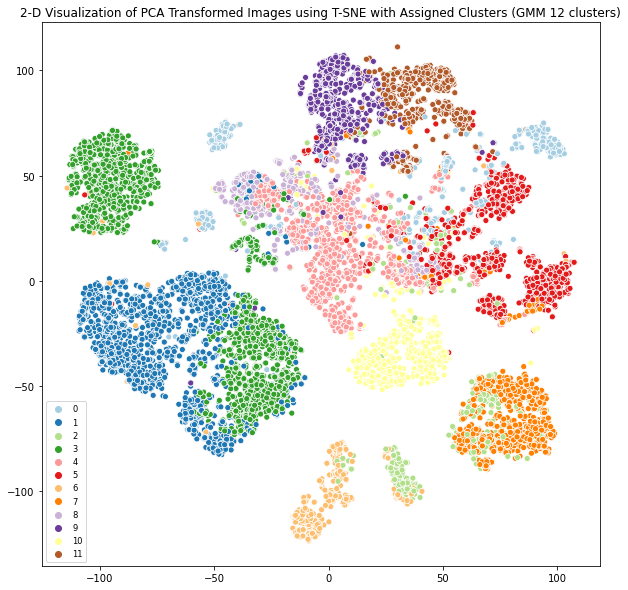

In [25]:
images_clusters = gmm_pca_fit.predict(train_images)
plt.subplots(figsize = (10, 10))

palette = sns.color_palette("Paired", N_CLUSTERS)
sns.scatterplot(x = tsne_results[:,0], 
                y = tsne_results[:,1], 
                hue=images_clusters,
                legend='full', 
                palette=palette)
fig_name = "2-D Visualization of PCA Transformed Images using T-SNE with Assigned Clusters (GMM %d clusters)"%N_CLUSTERS
plt.title(fig_name)
plt.legend(fontsize="small", loc="lower left")
plt.savefig(".\\Outputs\\" + fig_name + ".png")

# Comparing Predicted Clusters (Category) with actual categories

In [26]:
train_images_idx = utils.open_pickle(file = PICKLE_PATH + "train_images_names")

In [27]:
styles = pd.read_csv('.\\styles.csv', error_bad_lines = False)
sub_categories = [styles[styles['id']==i]['subCategory'].values[0] for i in train_images_idx]
del styles

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

Text(0.5, 1.0, '2-D Visualization of PCA Transformed Images using T-SNE with Actual Product Sub-Categories')

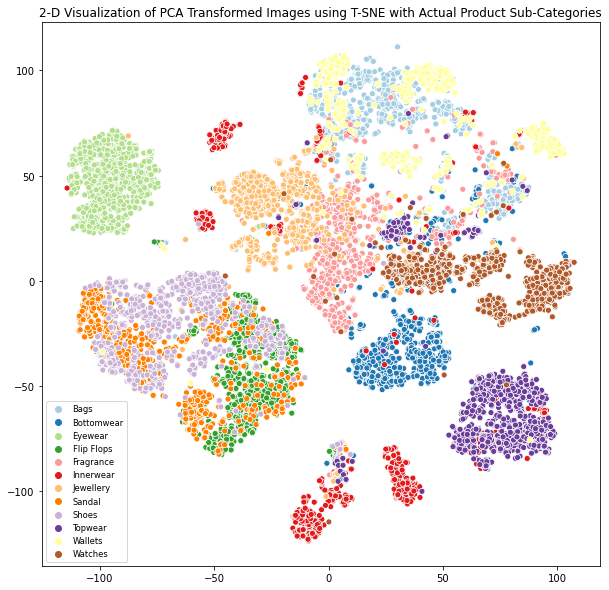

In [29]:
plt.subplots(figsize = (10, 10))
palette = sns.color_palette("Paired", len(set(sub_categories)))
sns.scatterplot(x = tsne_results[:,0], 
                y = tsne_results[:,1],
                hue = sub_categories, 
                legend='full', 
                palette=palette)
fig_name = "2-D Visualization of PCA Transformed Images using T-SNE with Actual Product Sub-Categories"
plt.title(fig_name)
plt.legend(fontsize="small", loc="lower left")
plt.savefig(".\\Outputs\\" + fig_name + ".png")
plt.title(fig_name)